In [1]:
import pandas as pd
import numpy as np
import itertools
import timeit
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import folium
import shutup
shutup.please()

In [2]:
df = pd.read_pickle('cleaned_df.pkl')
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
DATE OCC,,,,,,,,,,,,,,,,,,,
2020-01-01,200300501,2020-01-01,930,3,Southwest,392,624,BATTERY - SIMPLE ASSAULT,29,F,B,101.0,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2400 W 48TH ST,34.0001,-118.3192
2020-01-01,200113272,2020-01-01,1,1,Central,152,820,ORAL COPULATION,53,F,W,109.0,PARK/PLAYGROUND,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,500 S OLIVE ST,34.0495,-118.2529
2020-01-01,200807173,2020-01-01,1900,8,West LA,811,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",67,M,W,501.0,SINGLE FAMILY DWELLING,UNKNOWN,IC,Invest Cont,500 LUCERO AV,34.0458,-118.5540
2020-01-01,201404035,2020-01-01,730,14,Pacific,1406,626,INTIMATE PARTNER - SIMPLE ASSAULT,0,M,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BOTTLE,IC,Invest Cont,3700 MENTONE AV,34.0222,-118.4068
2020-01-01,211905178,2020-01-01,1159,19,Mission,1977,354,THEFT OF IDENTITY,36,M,W,101.0,STREET,UNKNOWN,IC,Invest Cont,9000 GREENBUSH AV,34.2333,-118.4331


In [3]:
geojson_file_path = 'LAPD_Divisions.geojson'
lapd_divisions = gpd.read_file(geojson_file_path)
lapd_divisions

,OBJECTID,APREC,PREC,AREA,PERIMETER,SHAPE_Length,SHAPE_Area,geometry
0,1,MISSION,19,6.995826e+08,190817.495739,0.576177,0.006363,"MULTIPOLYGON (((-118.50736 34.33464, -118.5038..."
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,0.534007,0.012249,"MULTIPOLYGON (((-118.50736 34.33464, -118.5066..."
2,3,FOOTHILL,16,1.297385e+09,203717.879169,0.627755,0.011797,"MULTIPOLYGON (((-118.41581 34.29384, -118.4156..."
3,4,TOPANGA,21,9.090326e+08,155505.795458,0.470165,0.008260,"MULTIPOLYGON (((-118.63166 34.23858, -118.6315..."
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,0.407795,0.008507,"MULTIPOLYGON (((-118.56229 34.22035, -118.5618..."
5,6,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,0.566582,0.005765,"MULTIPOLYGON (((-118.34264 34.11645, -118.3427..."
6,7,VAN NUYS,9,4.896950e+08,116288.308461,0.347249,0.004449,"MULTIPOLYGON (((-118.47325 34.21651, -118.4731..."
7,8,NORTHEAST,11,8.156022e+08,178460.722082,0.541347,0.007404,"MULTIPOLYGON (((-118.32904 34.15022, -118.3290..."
8,9,HOLLYWOOD,6,3.718353e+08,115808.747099,0.353721,0.003375,"MULTIPOLYGON (((-118.34695 34.11831, -118.3469..."
9,10,WEST LOS ANGELES,8,1.803659e+09,295206.415546,0.897951,0.016368,"MULTIPOLYGON (((-118.51758 34.02506, -118.5176..."


In [4]:
df['AREA NAME'] = df['AREA NAME'].str.replace('N Hollywood', 'North Hollywood')
df['AREA NAME'] = df['AREA NAME'].str.replace('West LA', 'West Los Angeles')

In [5]:
crime_counts = df['AREA NAME'].value_counts()
crime_counts_df = crime_counts.reset_index()
crime_counts_df.columns = ['Area Name', 'Count']
crime_counts_df['Area Name'] = crime_counts_df['Area Name'].str.upper()
crime_counts_df

,Area Name,Count
0,CENTRAL,54841
1,77TH STREET,51553
2,PACIFIC,47754
3,SOUTHWEST,45689
4,HOLLYWOOD,43268
5,SOUTHEAST,41620
6,OLYMPIC,41148
7,NEWTON,40859
8,NORTH HOLLYWOOD,40520
9,WILSHIRE,38685


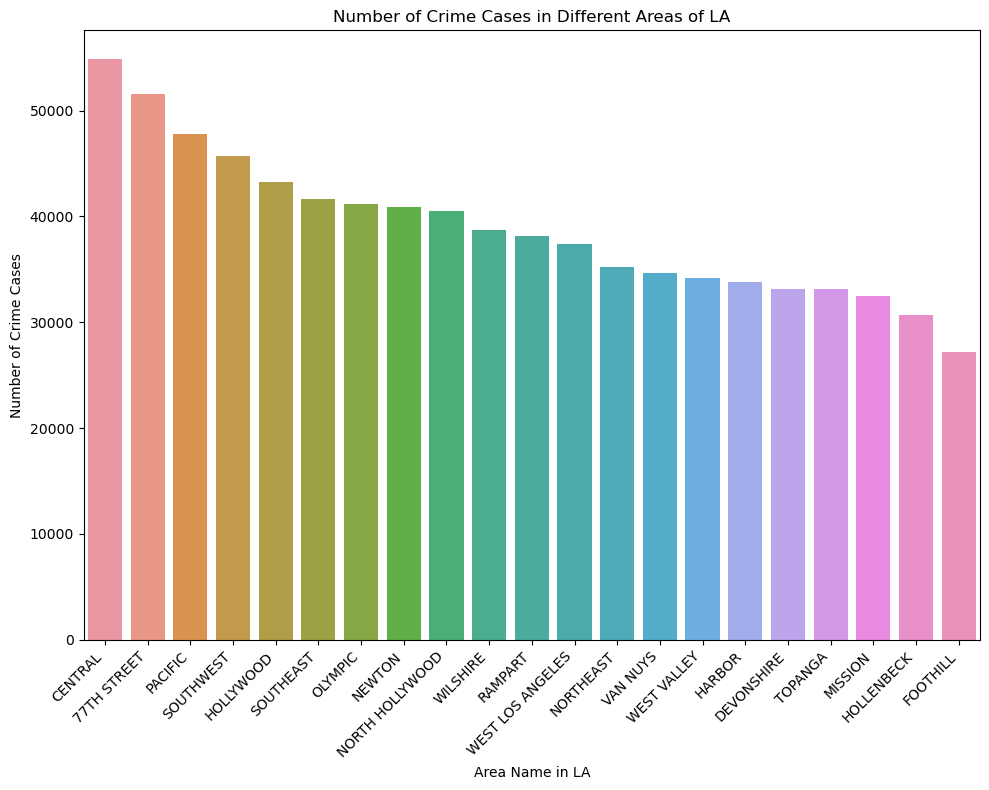

In [6]:
plt.figure(figsize=(10, 8))
sns.barplot(x = crime_counts_df['Area Name'], y = crime_counts_df['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Area Name in LA')
plt.ylabel('Number of Crime Cases')
plt.title('Number of Crime Cases in Different Areas of LA')
plt.tight_layout()
plt.savefig('./fig/Number of Crime Cases in Different Areas of LA.png')
plt.show()

In [7]:
mapLA = folium.Map(location = [34.052235, -118.243683], 
                   zoom_start = 10,
                   tiles = 'cartodbpositron')

choropleth = folium.Choropleth(
    geo_data = geojson_file_path,
    name = 'choropleth',
    data = crime_counts_df,
    columns = ['Area Name', 'Count'],
    key_on = 'feature.properties.APREC',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Reported Crimes in LA from 2020 -- 2023'
).add_to(mapLA)
mapLA

<Figure size 1000x800 with 0 Axes>

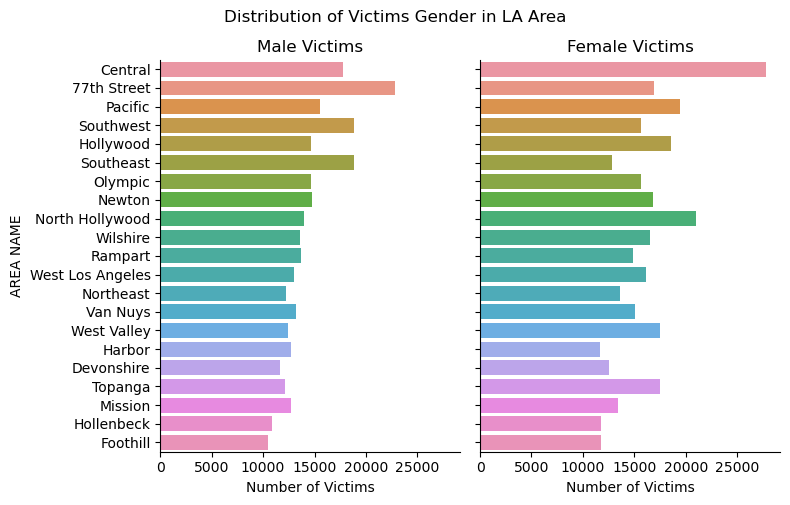

In [8]:
plt.figure(figsize = (10, 8))
g = sns.catplot(y = 'AREA NAME', col = 'Vict Sex',
                data = df[df['Vict Sex'].isin(['F', 'M'])], kind = "count",
                height = 5, aspect = 0.8,
                order = df['AREA NAME'].value_counts().index)

g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Male Victims')

g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('Female Victims')

g.fig.suptitle('Distribution of Victims Gender in LA Area', y = 1)
plt.subplots_adjust(top = 0.9)
plt.savefig('./fig/Distribution of Victims Gender in LA Area.png')
plt.show()

<Figure size 1000x800 with 0 Axes>

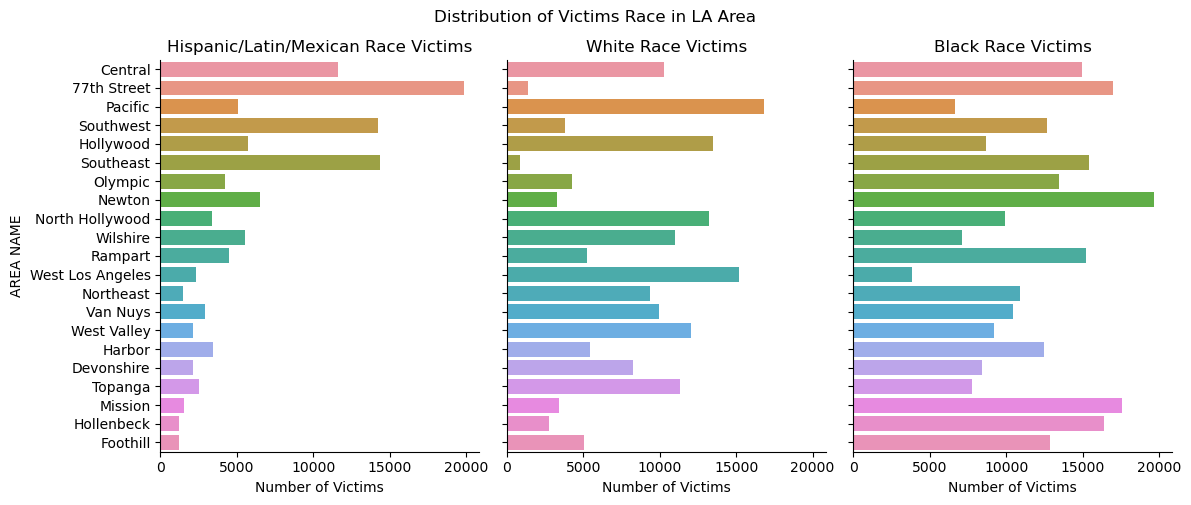

In [9]:
plt.figure(figsize = (10, 8))
g = sns.catplot(y = 'AREA NAME', col = 'Vict Descent',
                data = df[df['Vict Descent'].isin(['H', 'W', 'B'])], 
                kind = "count",
                height = 5, aspect = 0.8,
                order = df['AREA NAME'].value_counts().index)

g.axes[0,0].set_xlabel('Number of Victims')
g.axes[0,0].set_title('Hispanic/Latin/Mexican Race Victims')

g.axes[0,1].set_xlabel('Number of Victims')
g.axes[0,1].set_title('White Race Victims')

g.axes[0,2].set_xlabel('Number of Victims')
g.axes[0,2].set_title('Black Race Victims')

g.fig.suptitle('Distribution of Victims Race in LA Area', y = 1)
plt.subplots_adjust(top = 0.9)
plt.savefig('./fig/Distribution of Victims Race in LA Area.png')
plt.show()

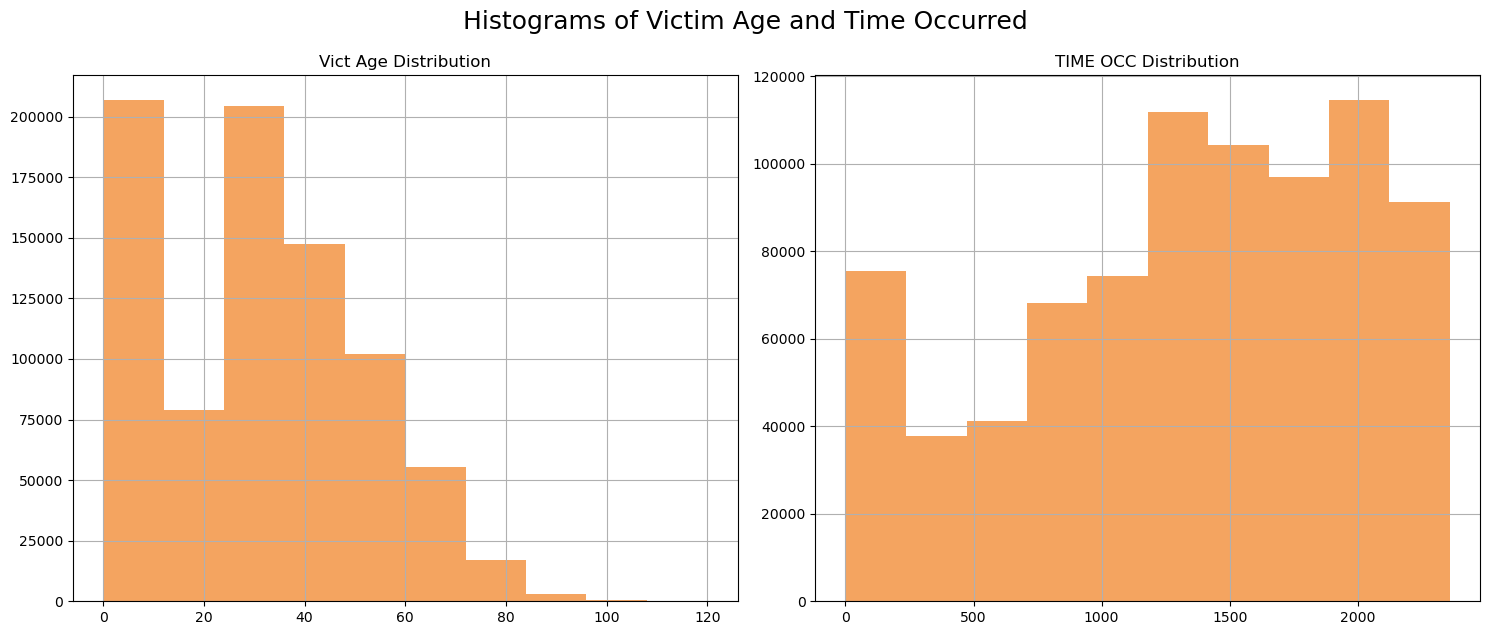

In [10]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize = (15,6))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins = 10, ax = ax, color ='sandybrown')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()
    plt.suptitle('Histograms of Victim Age and Time Occurred', y = 1.05, size = 18)
    plt.savefig('./fig/Histogram of Victim Age and Time Occurred.png')
    plt.show()

hist_var = ['Vict Age', 'TIME OCC']
numerical_hist = draw_histograms(df, hist_var, 1, 2)

In [11]:
crime_volume = pd.DataFrame(df.groupby(df.index.date).size(),
                            columns = ['crime_count']).reset_index()
crime_volume.rename(columns = {'index': 'Date'}, inplace = True)
crime_volume = crime_volume.set_index(['Date'])
crime_volume.index = pd.to_datetime(crime_volume.index)
monthly_crime = crime_volume.resample('MS').mean()

In [12]:
monthly_crime.head()

,crime_count
Date,
2020-01-01,596.161290
2020-02-01,594.896552
2020-03-01,521.193548
2020-04-01,522.533333
2020-05-01,554.838710


In [13]:
monthly_crime.to_pickle("monthly_crime_df.pkl")

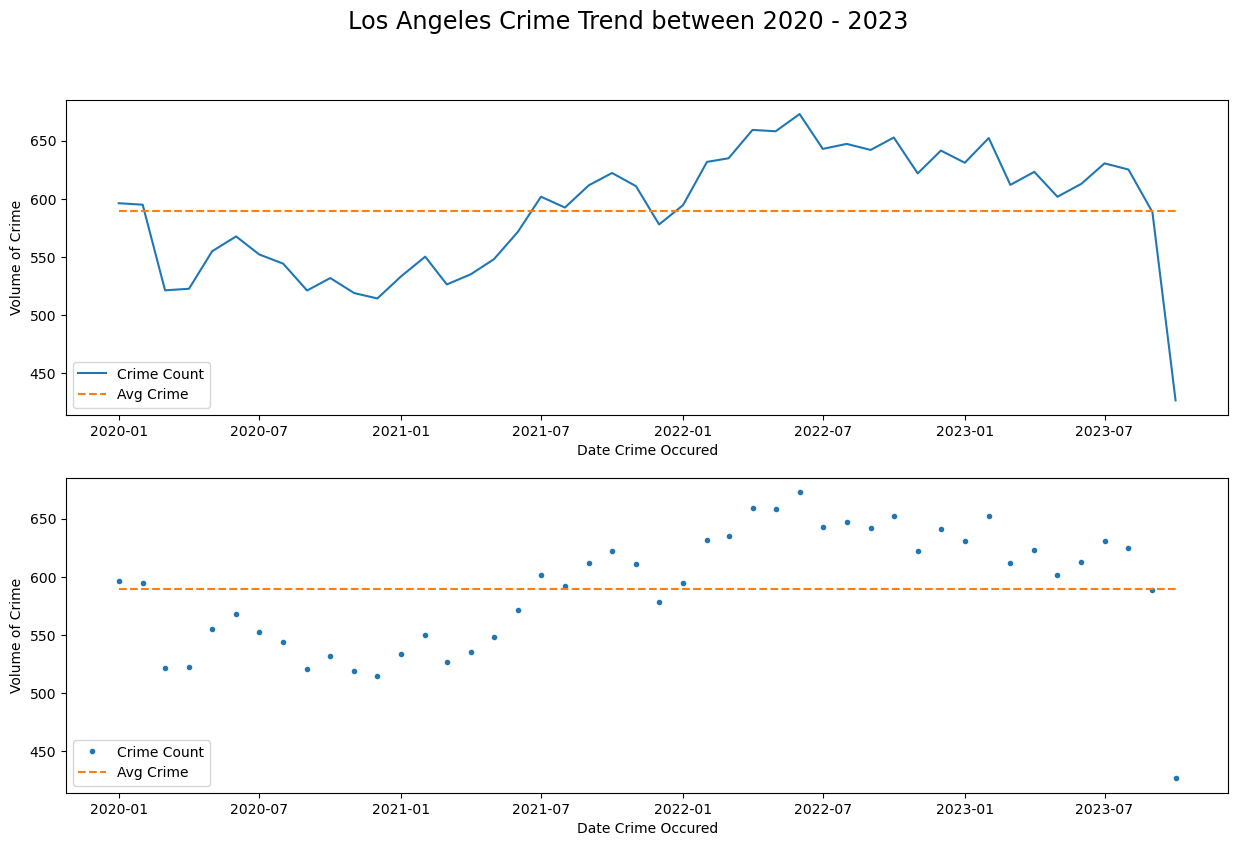

In [14]:
crime_trend,axs = plt.subplots(2, figsize = (15, 9))
crime_trend.suptitle('Los Angeles Crime Trend between 2020 - 2023', 
                     size = 'xx-large')

avg = y_mean = [np.mean(monthly_crime['crime_count']) for i in monthly_crime['crime_count']]

axs[0].plot(monthly_crime
            , label='Crime Count', color = 'tab:blue')
axs[0].plot(monthly_crime.index, avg, label = 'Avg Crime', 
            linestyle= '--', color = 'tab:orange')

axs[0].set_xlabel('Date Crime Occured')
axs[0].set_ylabel('Volume of Crime')

axs[1].plot(monthly_crime,'.b',label='Crime Count', color = 'tab:blue' )
axs[1].plot(monthly_crime.index, avg, label = 'Avg Crime', 
            linestyle = '--', color = 'tab:orange')

axs[1].set_xlabel('Date Crime Occured')
axs[1].set_ylabel('Volume of Crime')

axs[0].legend(loc = 'lower left')
axs[1].legend(loc = 'lower left')

plt.savefig('./fig/Monthly Crime Trend lineplot and dotplot.png');

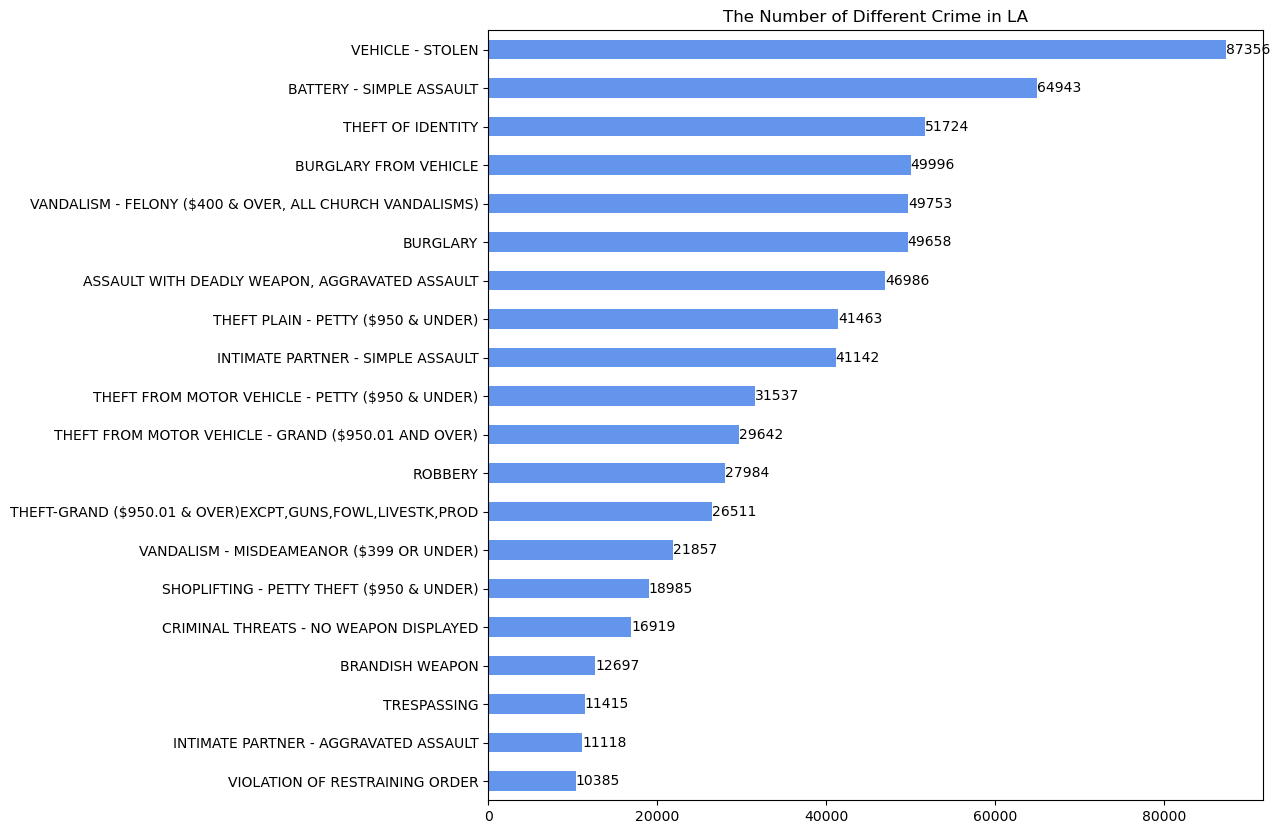

In [15]:
plt.figure(figsize = (10,10))
#df['Crm Cd Desc'].value_counts()[:20].plot(kind = 'barh').invert_yaxis()
ax = df['Crm Cd Desc'].value_counts()[:20].plot.barh(color = 'cornflowerblue')
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.title('The Number of Different Crime in LA')
plt.savefig('./fig/Number_of_Differnet_Crime.png', bbox_inches = 'tight')

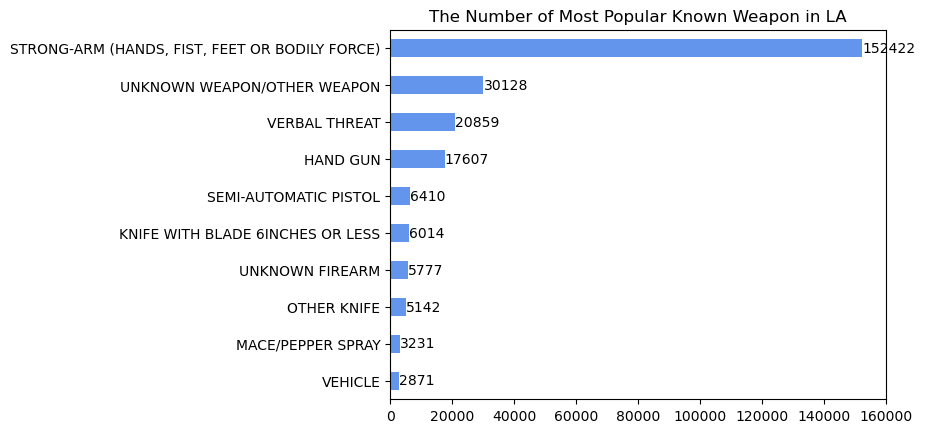

In [16]:
ax = df[df['Weapon Desc'] != 'UNKNOWN']['Weapon Desc'].value_counts()[:10].plot.barh(color = 'cornflowerblue')
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.title('The Number of Most Popular Known Weapon in LA')
plt.savefig('./fig/Number_of_Differnet_known_Weapon.png',bbox_inches = 'tight')

In [17]:
unknown_weapon = df[df['Weapon Desc'] == 'UNKNOWN']
unknown_weapon.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
DATE OCC,,,,,,,,,,,,,,,,,,,
2020-01-01,200807173,2020-01-01,1900,8,West Los Angeles,811,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",67,M,W,501.0,SINGLE FAMILY DWELLING,UNKNOWN,IC,Invest Cont,500 LUCERO AV,34.0458,-118.5540
2020-01-01,211905178,2020-01-01,1159,19,Mission,1977,354,THEFT OF IDENTITY,36,M,W,101.0,STREET,UNKNOWN,IC,Invest Cont,9000 GREENBUSH AV,34.2333,-118.4331
2020-01-01,201904035,2020-01-01,2100,19,Mission,1987,330,BURGLARY FROM VEHICLE,31,M,H,101.0,STREET,UNKNOWN,IC,Invest Cont,8400 VENTURA CANYON AV,34.2269,-118.4394
2020-01-01,212106954,2020-01-01,1955,21,Topanga,2145,354,THEFT OF IDENTITY,61,F,H,501.0,SINGLE FAMILY DWELLING,UNKNOWN,IC,Invest Cont,6800 GLADE AV,34.1937,-118.6081
2020-01-01,221016258,2020-01-01,1,10,West Valley,1067,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",30,F,O,501.0,SINGLE FAMILY DWELLING,UNKNOWN,IC,Invest Cont,5200 GENESTA AV,34.1660,-118.5033


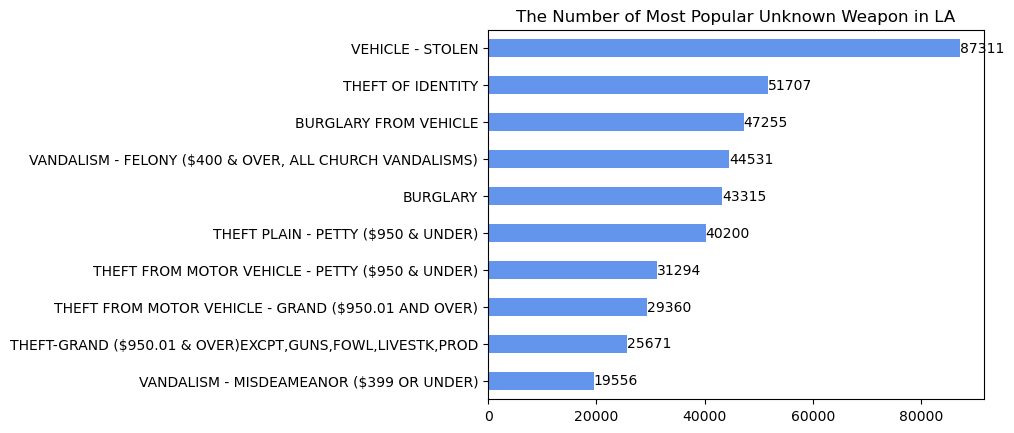

In [18]:
ax = unknown_weapon['Crm Cd Desc'].value_counts()[:10].plot.barh(color = 'cornflowerblue')
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.title('The Number of Most Popular Unknown Weapon in LA')
plt.savefig('./fig/Number_of_Differnet_Unknown_Weapon.png', bbox_inches = 'tight')

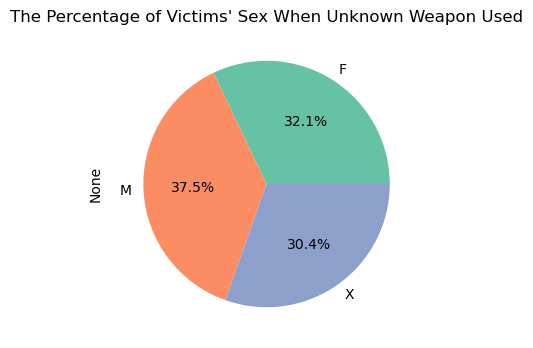

In [19]:
unknown_weapon.groupby('Vict Sex').size().plot.pie(figsize = (4,4),
                                                   autopct = '%1.1f%%',
                                                   colors = sns.color_palette('Set2'))
plt.title('The Percentage of Victims\' Sex When Unknown Weapon Used')
plt.savefig('./fig/Percentage_Sex_Unknown_Weapon.png', bbox_inches = 'tight')
plt.show()

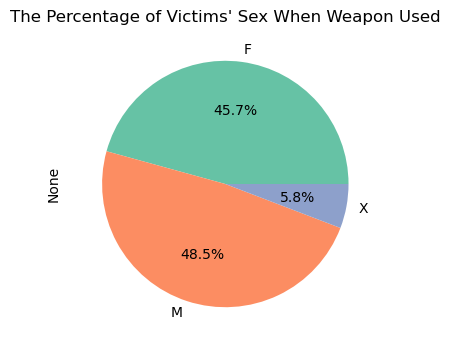

In [20]:
df[df['Weapon Desc'] != 'UNKNOWN'].groupby('Vict Sex').size().plot.pie(figsize = (4,4),
                                                                                   autopct = '%1.1f%%',
                                                                                   colors = sns.color_palette('Set2'))
plt.title('The Percentage of Victims\' Sex When Weapon Used')
plt.savefig('./fig/Percentage_Sex_Known_Weapon.png', bbox_inches = 'tight')
plt.show()